# 如何用Lightkurve取得系外行星的觀測資料？
此notebook為專欄文章"[「天聞的資料科學」如何用Lightkurve取得系外行星的觀測資料？](https://matters.town/@astrobackhacker/407438-%E5%A4%A9%E8%81%9E%E7%9A%84%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E5%A6%82%E4%BD%95%E7%94%A8lightkurve%E5%8F%96%E5%BE%97%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F%E7%9A%84%E8%A7%80%E6%B8%AC%E8%B3%87%E6%96%99-bafybeifjs4rrrgkeh4kb3awq4lpsvvvu7loukr4ts5fst6lk7ew7yk6uwa)"的相關程式碼，由[蘇羿豪](https://astrobackhacker.tw/)編寫，並以[MIT授權條款](https://github.com/YihaoSu/data-science-with-astronomy-news/blob/main/LICENSE)釋出。此外，本專欄也是[「天文的資料科學」教育產品開發計畫](https://matters.news/@astrobackhacker/364036-%E5%A4%A9%E6%96%87%E7%9A%84%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8-%E4%BE%86%E7%94%A8python%E6%8B%89%E8%BF%91%E6%88%91%E5%80%91%E8%88%87%E6%98%9F%E7%A9%BA%E7%9A%84%E8%B7%9D%E9%9B%A2-%E6%95%99%E8%82%B2%E7%94%A2%E5%93%81%E9%96%8B%E7%99%BC%E8%AA%BF%E6%9F%A5%E8%A1%A8%E5%96%AE-bafybeiahet2kggahd2wwst6flujiwkdwvg6wyiz23c4dtlgyvn2odhfdfi)的一部分，如果你想要體驗更多從資料產出天文新知識的旅程，歡迎填寫[這份調查表單](https://docs.google.com/forms/d/e/1FAIpQLSdSjnrvdsqAtALGfIMxXhQMZ9PRO-e_2ML6kzg6tjqyHNl1eA/viewform)，讓我能根據你的需求及建議，制定適合你的教學內容及呈現方式。

## 什麼是Lightkurve？
[Lightkurve](https://docs.lightkurve.org/)套件能搜尋並下載[Kepler太空望遠鏡](https://zh.wikipedia.org/zh-tw/%E5%85%8B%E5%8D%9C%E5%8B%92%E5%A4%AA%E7%A9%BA%E6%9C%9B%E9%81%A0%E9%8F%A1)(Kepler、K2)和[凌日系外行星巡天衛星](https://zh.wikipedia.org/zh-tw/%E5%87%8C%E6%97%A5%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F%E5%B7%A1%E5%A4%A9%E8%A1%9B%E6%98%9F)(Transiting Exoplanet Survey Satellite, TESS)的影像及[光變曲線](https://zh.wikipedia.org/zh-tw/%E5%85%89%E8%AE%8A%E6%9B%B2%E7%B7%9A)觀測資料，且能分析光變週期，以[凌日法](https://zh.wikipedia.org/zh-tw/%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F%E5%81%B5%E6%B8%AC%E6%B3%95#%E5%87%8C%E6%97%A5%E6%B3%95)尋找位於太陽系之外的行星(簡稱[系外行星](https://zh.wikipedia.org/zh-tw/%E5%A4%AA%E9%99%BD%E7%B3%BB%E5%A4%96%E8%A1%8C%E6%98%9F))。

## 安裝Lightkurve

In [ ]:
pip install lightkurve

## 範例1：用Lightkurve取得系外行星所屬恆星的光變曲線資料並分析行星軌道週期

In [2]:
import lightkurve as lk

# 系外行星所屬恆星名稱
target = 'Kepler-10'

# 觀測任務，可選Kepler、K2或TESS
mission = 'Kepler'

# 使用 Lightkurve的search_lightcurve()函式來搜索目標恆星的光變曲線觀測資料
search_result = lk.search_lightcurve(target, mission=mission)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr011904151,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr011904151,0.0
2,Kepler Quarter 02,2009,Kepler,60,kplr011904151,0.0
3,Kepler Quarter 02,2009,Kepler,1800,kplr011904151,0.0
4,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
5,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
6,Kepler Quarter 03,2009,Kepler,60,kplr011904151,0.0
7,Kepler Quarter 03,2009,Kepler,1800,kplr011904151,0.0
8,Kepler Quarter 04,2010,Kepler,60,kplr011904151,0.0


In [3]:
# 從搜索結果中下載其中一個光變曲線資料(回傳LightCurve物件)
lc = search_result[0].download()
lc

time,flux,flux_err,quality,timecorr,centroid_col,centroid_row,cadenceno,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,sap_quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,,d,pix,pix,,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,int32,float32,float64,float64,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
120.5391465105713,5.0146684e+05,2.0574972e+01,0,9.940906e-04,659.36896,250.31948,568,5.3272462e+05,2.0045162e+01,2.4877234e+03,1.3237703e+00,5.0146684e+05,2.0574972e+01,0,———,———,———,———,659.36896,3.6308160e-05,250.31948,5.3553398e-05,1.7792054e-03,3.3286733e-03
120.55958073025249,5.0141212e+05,2.0597826e+01,0,9.947103e-04,659.36919,250.31978,569,5.3274544e+05,2.0045479e+01,2.4910432e+03,1.3229831e+00,5.0141212e+05,2.0597826e+01,0,———,———,———,———,659.36919,3.6305861e-05,250.31978,5.3553318e-05,1.9566093e-03,3.5631030e-03
120.58001484981651,5.0140281e+05,2.0634075e+01,0,9.953298e-04,659.36918,250.31934,570,5.3274400e+05,2.0045910e+01,2.4830063e+03,1.3249981e+00,5.0140281e+05,2.0634075e+01,0,———,———,———,———,659.36918,3.6309517e-05,250.31934,5.3547948e-05,2.0698714e-03,3.4072644e-03
120.60044916937477,5.0135972e+05,2.0607729e+01,0,9.959494e-04,659.36967,250.31932,571,5.3266388e+05,2.0044411e+01,2.4886853e+03,1.3235550e+00,5.0135972e+05,2.0607729e+01,0,———,———,———,———,659.36967,3.6312224e-05,250.31932,5.3564647e-05,2.4259784e-03,3.0491522e-03
120.62088338893955,5.0144759e+05,2.0585588e+01,0,9.965689e-04,659.36989,250.31906,572,5.3276494e+05,2.0046177e+01,2.4869612e+03,1.3239022e+00,5.0144759e+05,2.0585588e+01,0,———,———,———,———,659.36989,3.6307927e-05,250.31906,5.3543699e-05,2.7262936e-03,3.2327282e-03
120.64131750838715,5.0142422e+05,2.0622503e+01,0,9.971884e-04,659.37001,250.31846,573,5.3270619e+05,2.0045256e+01,2.4852412e+03,1.3248761e+00,5.0142422e+05,2.0622503e+01,0,———,———,———,———,659.37001,3.6310295e-05,250.31846,5.3552700e-05,2.8024365e-03,2.5497559e-03
120.66175172782823,5.0134612e+05,2.0596804e+01,0,9.978078e-04,659.37024,250.31868,574,5.3262088e+05,2.0043943e+01,2.4874382e+03,1.3227766e+00,5.0134612e+05,2.0596804e+01,0,———,———,———,———,659.37024,3.6316073e-05,250.31868,5.3557891e-05,2.9968296e-03,2.9109719e-03
120.68218604727736,5.0136928e+05,2.0572752e+01,0,9.984273e-04,659.37011,250.31860,575,5.3262475e+05,2.0044262e+01,2.4853333e+03,1.3250123e+00,5.0136928e+05,2.0572752e+01,0,———,———,———,———,659.37011,3.6316418e-05,250.31860,5.3558793e-05,2.9321318e-03,2.7981971e-03


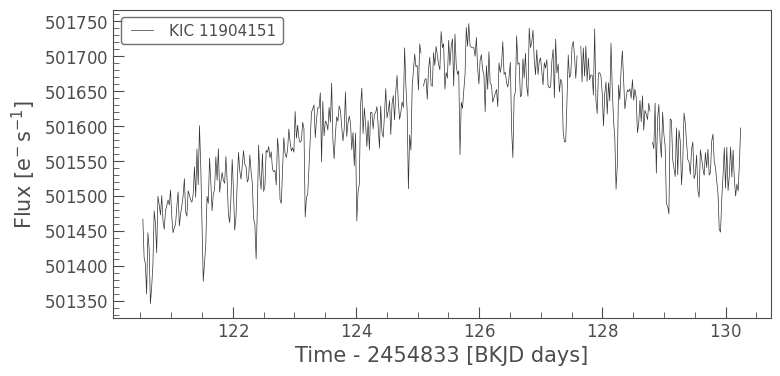

In [4]:
%matplotlib inline

# 使用LightCurve物件的plot()方法來畫出光變曲線
lc.plot();

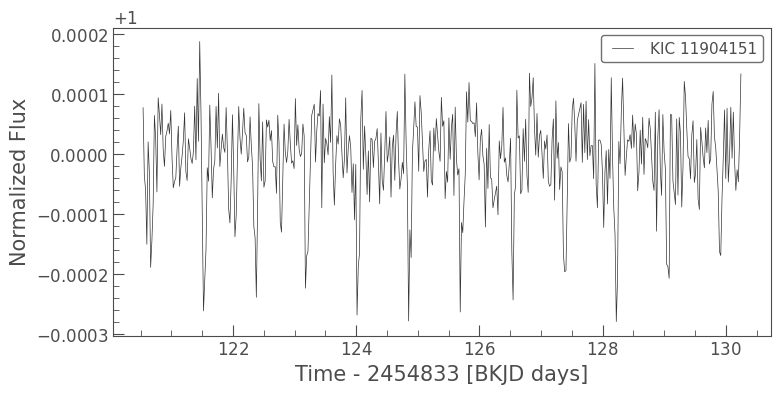

In [5]:
# 使用LightCurve物件的flatten()方法來去除光變曲線的趨勢
lc = lc.flatten()

# 使用LightCurve物件的remove_outliers()方法來去除光變曲線的異常值
lc = lc.remove_outliers()

# 畫出處理後的光變曲線
lc.plot();

行星軌道週期： 0.8386148482771694天


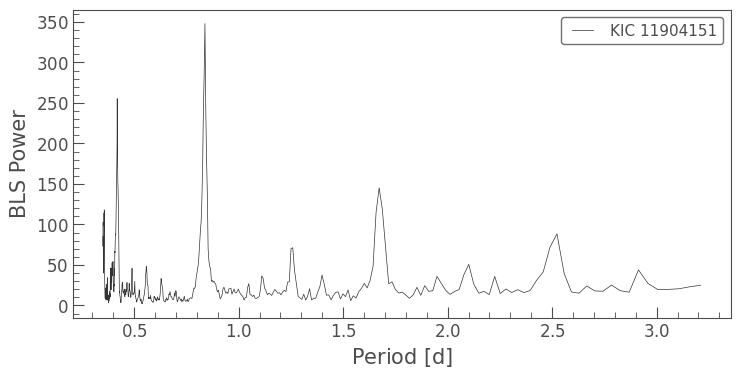

In [6]:
# 使用LightCurve物件的to_periodogram()方法來將光變曲線轉換成Periodogram power spectrum
# bls表示使用Box Least Squares這個週期計算演算法
periodogram = lc.to_periodogram('bls')

# 使用Periodogram power spectrum物件的period_at_max_power屬性來找到最佳擬合的軌道週期
best_fit_orbital_period = periodogram.period_at_max_power.value

# 繪製Periodogram power spectrum
periodogram.plot()

# 印出最佳擬合的軌道週期
print(f'行星軌道週期： {best_fit_orbital_period}天')

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

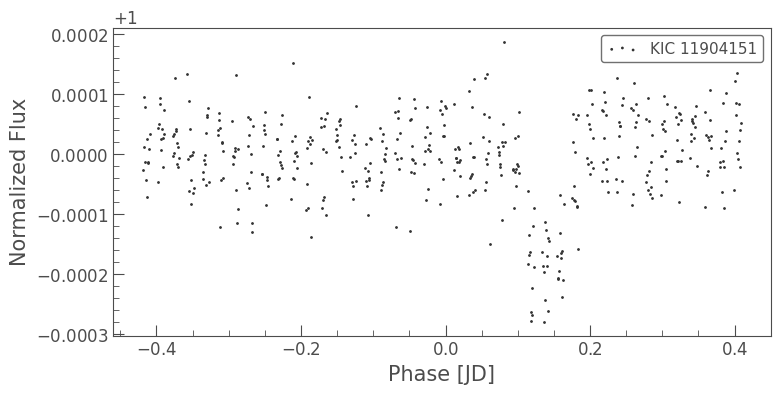

In [7]:
# 使用LightCurve物件的fold()方法來將光變曲線摺疊，並使用scatter()方法來繪製摺疊後的光變曲線，以便看出行星凌日現象
lc.fold(best_fit_orbital_period).scatter()